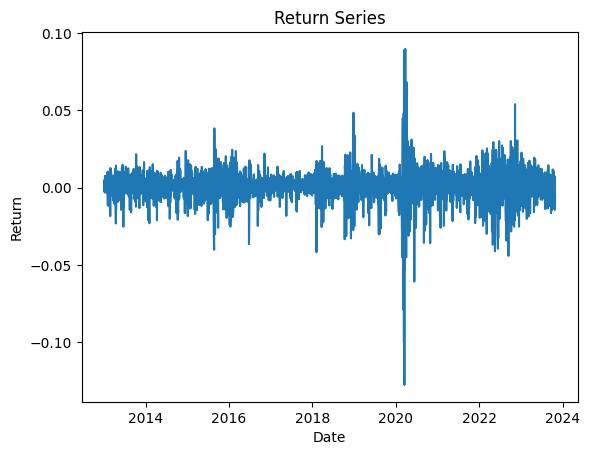

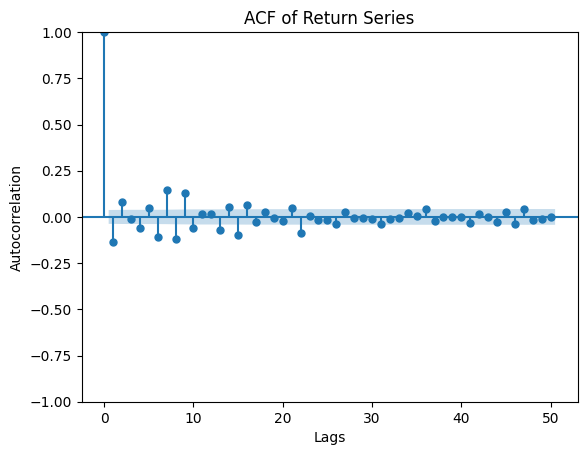

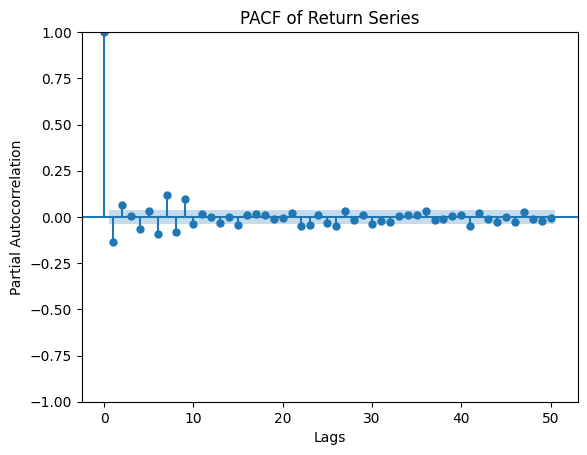

ADF test statistic: -16.340861187587777
p-value: 2.99686323533748e-29


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Reading the SP500 index data from the Excel file
sp500 = pd.read_excel('SP500.xlsx', index_col=0)

# Sorting the data by chronological order
sp500 = sp500.sort_index(ascending=True)

#sp500 = sp500.asfreq('B')
# Generating the return series
R = np.log(sp500['Close']).diff()
# R = R.asfreq('B')
# Plotting the return series
plt.plot(R)
plt.title('Return Series')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

# Plotting the ACF and PACF of the return series
plot_acf(R.dropna(), lags=50)
plt.title('ACF of Return Series')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

plot_pacf(R.dropna(), lags=50)
plt.title('PACF of Return Series')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


from statsmodels.tsa.stattools import adfuller

# Performing the ADF test on the return series
result = adfuller(R.dropna())

# Extracting the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Printing the test results
print(f"ADF test statistic: {test_statistic}")
print(f"p-value: {p_value}")

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2822
Model:                 ARIMA(1, 1, 1)   Log Likelihood                8452.088
Date:                Mon, 30 Oct 2023   AIC                         -16898.176
Time:                        13:19:31   BIC                         -16880.341
Sample:                    01-03-2013   HQIC                        -16891.741
                         - 10-27-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1333      0.007    -18.612      0.000      -0.147      -0.119
ma.L1         -0.9998      0.014    -71.649      0.000      -1.027      -0.972
sigma2         0.0001   1.79e-06     65.371      0.0

c:\Users\37103\anaconda3\envs\corl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\37103\AppData\Roaming\Python\Python39\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


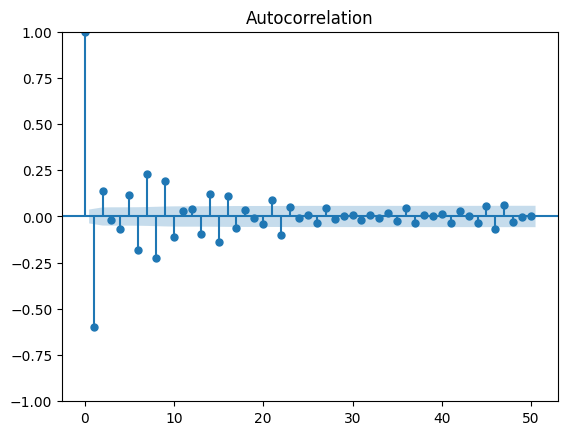

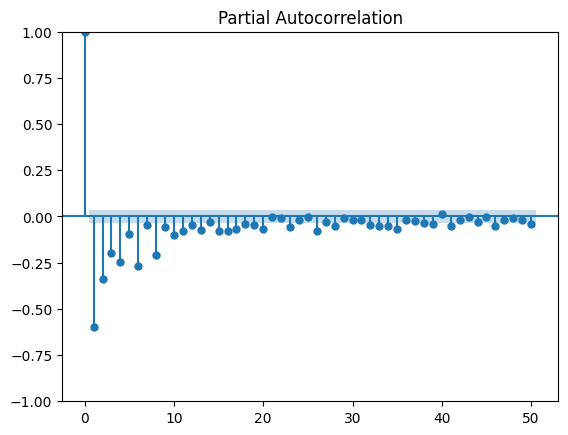

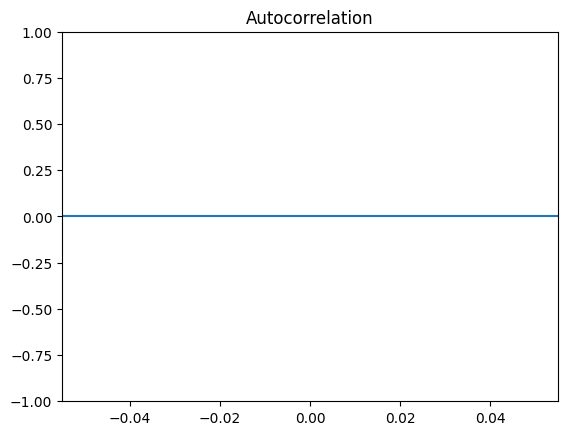

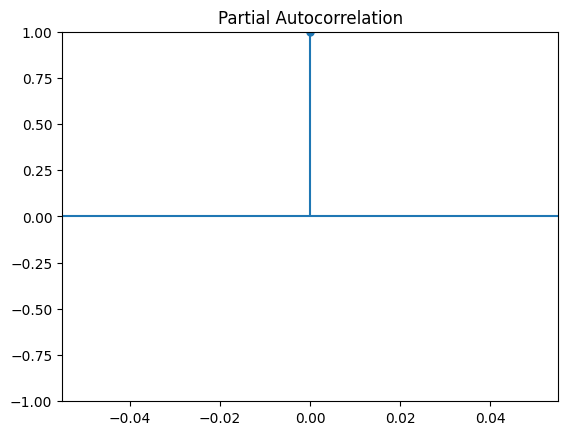

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Identification
diff_R = R.diff().dropna()
plot_acf(diff_R, lags=50)
plot_pacf(diff_R, lags=50)

# Based on the ACF and PACF plots, we can try an ARIMA(1,1,1) model
model = ARIMA(R.dropna().asfreq('B'), order=(1,1,1))

# Step 2: Estimation
result = model.fit()

# Step 3: Diagnostic checking
residuals = result.resid
plot_acf(residuals, lags=50)
plot_pacf(residuals, lags=50)

# Print the model summary
print(result.summary())

In [15]:
# forecast_result = result.get_forecast(steps=5)




# # 输出预测值
# print(forecast_result.predicted_mean)

# # 输出标准误差
# print(forecast_result.se_mean)

# # 输出置信区间
# print(forecast_result.conf_int())

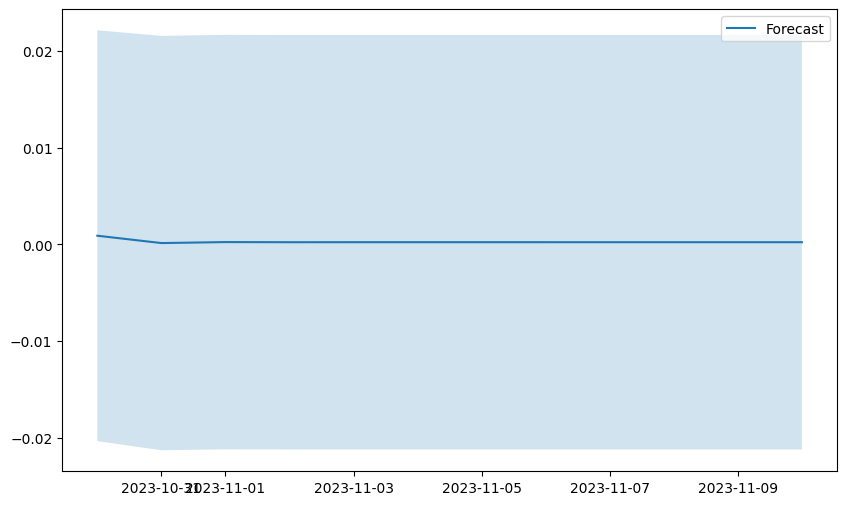

In [37]:
# 7. Forecast return series for next week
forecast_result = result.get_forecast(steps=10)

# Plot return series with forecasts and confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(returns.index, returns.values, label='Actual')
returns = np.log(forecast_result.predicted_mean).diff()
# ax.plot(returns.index, returns.values, label="return series")
ax.plot(forecast_result.predicted_mean.index, forecast_result.predicted_mean.values, label='Forecast')
ax.fill_between(forecast_result.conf_int().index, forecast_result.conf_int().iloc[:, 0], forecast_result.conf_int().iloc[:, 1], alpha=0.2)
ax.legend()
plt.show()

In [33]:
print(forecast_result.predicted_mean.values)

[0.00089226 0.00013174 0.00023314 0.00021962 0.00022142 0.00022118
 0.00022121 0.00022121 0.00022121 0.00022121]


In [34]:
returns.index

DatetimeIndex(['2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02',
               '2023-11-03', '2023-11-06', '2023-11-07', '2023-11-08',
               '2023-11-09', '2023-11-10'],
              dtype='datetime64[ns]', freq='B')

In [35]:
forecast_result.predicted_mean.index

DatetimeIndex(['2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02',
               '2023-11-03', '2023-11-06', '2023-11-07', '2023-11-08',
               '2023-11-09', '2023-11-10'],
              dtype='datetime64[ns]', freq='B')